# Reduction du bruit aéronautique 

### Introduction

Ce notebook a pour but de présenter les différents filtres conçus dans le but de réduire le bruit de nos audios. L'objectif principal n'est pas ici de "nettoyer" les données audio afin d'obtenir le signal sonore le plus propre mais plutôt de rechercher un rapport qualité reconnaissance vocale / temps de traitement des données le plus optimal possible. 

Aussi ce notebook aura pour but de détailler l'élaboration des différents filtres puis de tester leurs performances sur un dataset noisy_data qui comprend un échantillon de 10 audios jugés très bruités comparés aux autres.

In [4]:
#Import des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile  # Pour lire un fichier audio
import wave
import librosa
import os
from IPython.display import Audio, IFrame, display

Lisons d'abord nos enregistrements :

In [6]:
# Chemin vers le dossier contenant les fichiers audio WAV
dossier_audio = 'noisy_data'

# Fréquence d'échantillonnage souhaitée
sr = 16000

# Liste pour stocker les signaux audio et les noms des fichiers
audio_list = []

# Parcours des fichiers dans le dossier
for filename in os.listdir(dossier_audio):
    if filename.endswith('.wav'):  # Vérifie l'extension du fichier
        filepath = os.path.join(dossier_audio, filename)  # Chemin complet du fichier
        # Chargement du fichier audio
        y, _ = librosa.load(filepath, mono=True, sr=sr)
        audio_list.append((y, sr, filename))  # Ajoute le signal audio et le nom du fichier à la liste

# Maintenant, audio_list contient tous les signaux audio chargés et leur nom de fichier correspondant


In [7]:
# Affichage de tous les fichiers audio de la liste audio_list
for audio_data in audio_list:
    display(Audio(audio_data[0], rate=audio_data[1]))

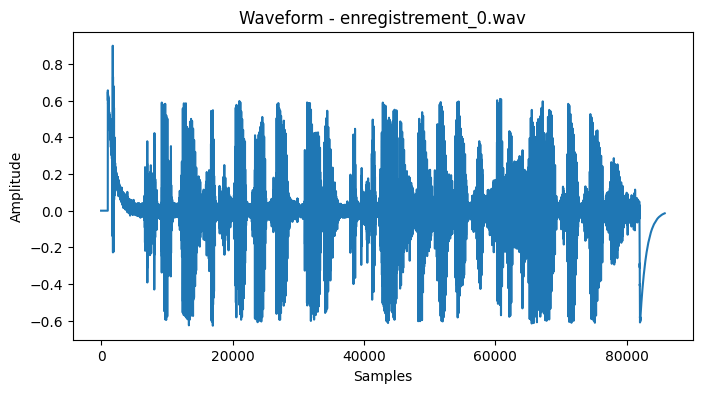

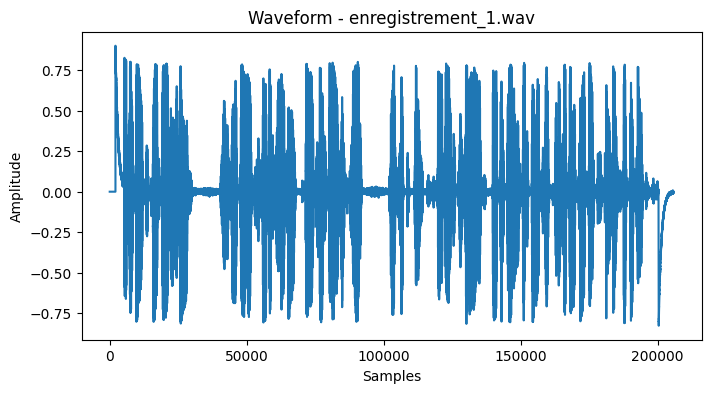

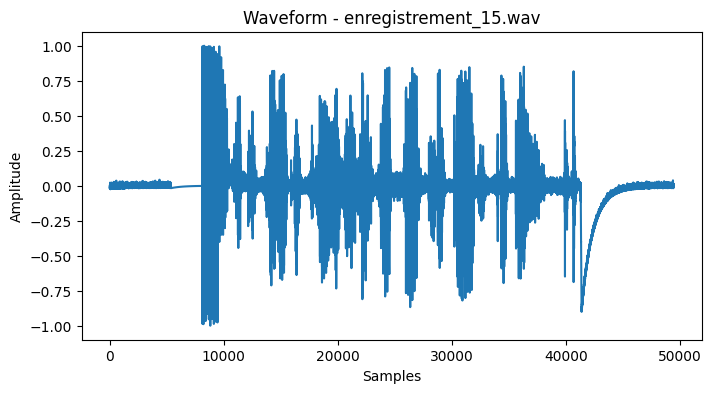

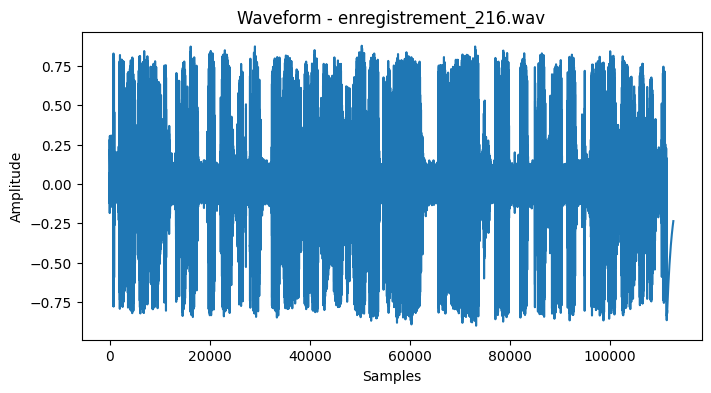

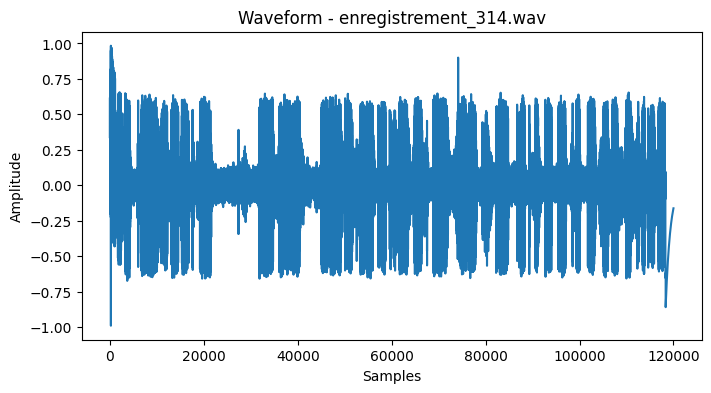

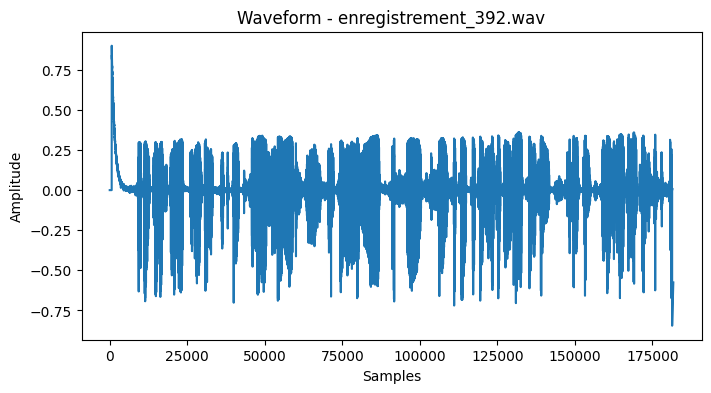

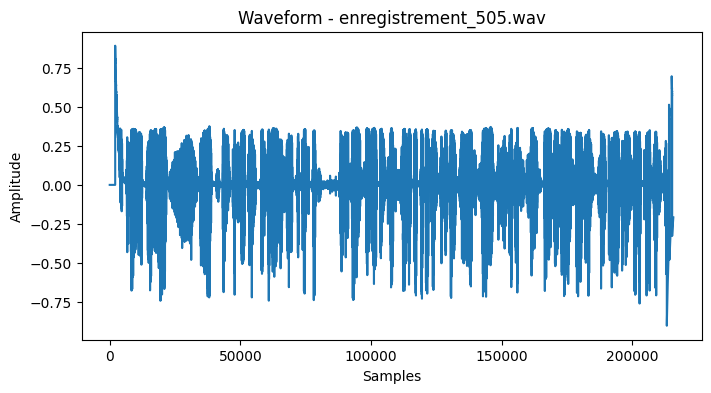

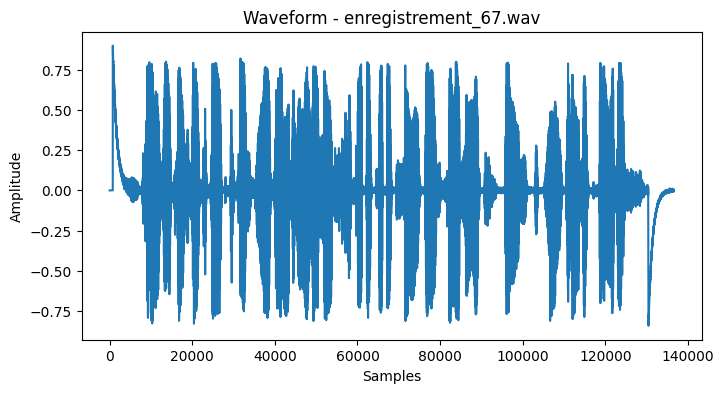

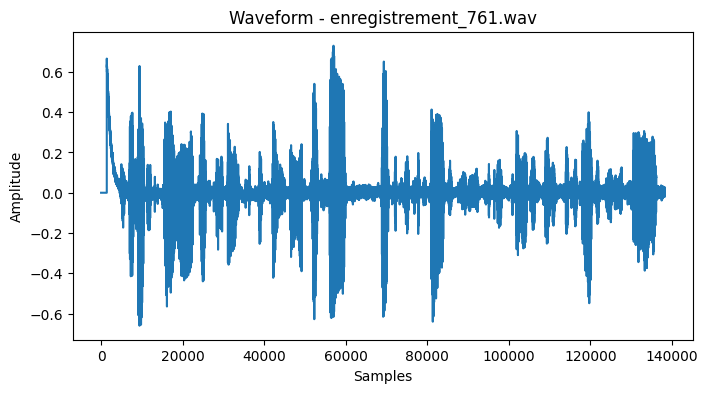

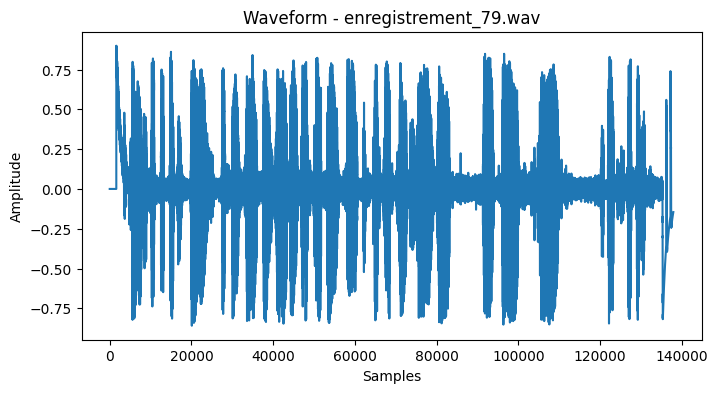

In [9]:
# Affichage de la forme d'onde pour tous les fichiers audio de la liste audio_list
for audio_data in audio_list:
    y = audio_data[0]  # Signal audio
    sr = audio_data[1]  # Fréquence d'échantillonnage
    filename = audio_data[2]  # Nom du fichier
    
    plt.figure(figsize=(8, 4))
    plt.plot(y)
    plt.title(f'Waveform - {filename}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

### Elaboration des méthodes de réduction de bruit

#### 1ère méthode : filtre passe-bande 

Une première méthode que nous qualifierons de niaise consiste à essayer de construire un filtre passe-bande qui va essayer de ne récupérer que 

In [ ]:
# Lecture du fichier audio
sample_rate, audio_data = wavfile.read('enregistrement_24.wav')

# Calcul de la FFT
fft_result = np.fft.fft(audio_data)

# Calcul des fréquences correspondantes
frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_rate)

# On ignore fréquences négatives et on prend seulement la moitié des résultats (car la FFT est symétrique)
positive_frequencies = frequencies[:len(frequencies) // 2]
magnitude = np.abs(fft_result)[:len(frequencies) // 2]

# Tracé du spectre en fréquence initial
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, magnitude, label='Spectre initial', color='blue')
plt.title('Spectre en fréquence')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude')
plt.grid()

# Définir les fréquences de coupure du passe-bande
low_cutoff = 450  # fréquence de coupure inférieure
high_cutoff = 2500 # fréquence de coupure supérieure

# Création d'un filtre passe-bande
filter_indices = np.where((positive_frequencies >= low_cutoff) & (positive_frequencies <= high_cutoff))
fft_result_bandpass = np.zeros_like(fft_result)
fft_result_bandpass[filter_indices] = fft_result[filter_indices]

# Reconstruction du signal filtré en utilisant l'inverse de la FFT
audio_data_bandpass = np.fft.ifft(fft_result_bandpass).real

# Augmentation du volume du signal filtré (amplification)
#amplification_factor = 1.3  # Facteur d'amplification
#audio_data_amplified = audio_data_bandpass * amplification_factor


# Création d'un fichier audio à partir du signal filtré
scaled = np.int16(audio_data_bandpass / np.max(np.abs(audio_data_bandpass)) * 32767)
wavfile.write('audio_filtre_24_V450_2500.wav', sample_rate, scaled)


# Afficher le plot
plt.plot(positive_frequencies, np.abs(fft_result_bandpass)[:len(positive_frequencies)], label='Spectre après filtrage passe-bande', color='red')
plt.legend()
plt.show()

### Tests de performances des différents méthodes

### Conclusion